#### 다항회귀
- 직선으로 많은 데이터를 만족 할 수 없는 선형회귀의 경우 사용
- 기존 피쳐를 조합해서 항을 늘여주는 작업 진행 -> 전처리에서 진행


In [2]:
### 모듈로딩
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [5]:
# 임의의 데이터 생성 -> 2D
X=np.arange(10).reshape(-1,2) # arange(4) -> 형태변경 arange(10).reshape(-1,2) # -1의 의미가 시스템한테 알아서해라라는 의미
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [10]:
# 3차원 형태 reshape(2,-1,1) 2장에 행은 니맘대로 열은 한개로 계산
poly = PolynomialFeatures(include_bias=False)
poly.fit(X)
poly.transform(X)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.],
       [ 8.,  9., 64., 72., 81.]])

In [11]:
X1=poly.fit_transform(X)
X1

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.],
       [ 8.,  9., 64., 72., 81.]])

In [9]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [16]:
# 피쳐 2개 -> 조합해서 늘리기
poly = PolynomialFeatures(include_bias=False, degree=4)
X1=poly.fit_transform(X)
print(poly.get_feature_names_out())
print(X1.shape)

['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3' 'x0^4'
 'x0^3 x1' 'x0^2 x1^2' 'x0 x1^3' 'x1^4']
(5, 14)


In [17]:
# 임의의 데이터 생성 -> 2D
X=np.arange(10).reshape(-1,2)
y=np.arange(5)
X.shape, y.shape

((5, 2), (5,))

### 모델에 적용

In [18]:
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(include_bias=False, degree=5)
X1=poly.fit_transform(X)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly', poly), ('lrmodel', model)])

pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('lrmodel', LinearRegression())])

In [21]:
pipe.named_steps['lrmodel'].coef_

array([ 9.21052632e-02,  9.21052632e-02, -9.21052632e-02,  4.78186150e-15,
        9.21052632e-02,  5.26315789e-02, -3.94736842e-02, -3.94736842e-02,
        5.26315789e-02, -1.31578947e-02,  3.94736842e-02, -3.95136370e-15,
       -3.94736842e-02,  1.31578947e-02])

In [22]:
pipe.named_steps['poly'].degree

4

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [25]:
# 임의의 값으로 구성된 X 값에 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5* np.pi * X)
# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 True_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE 는 0.043208749872317626 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08]입니다.
Degree 15 MSE 는 182493841.77304456 입니다.


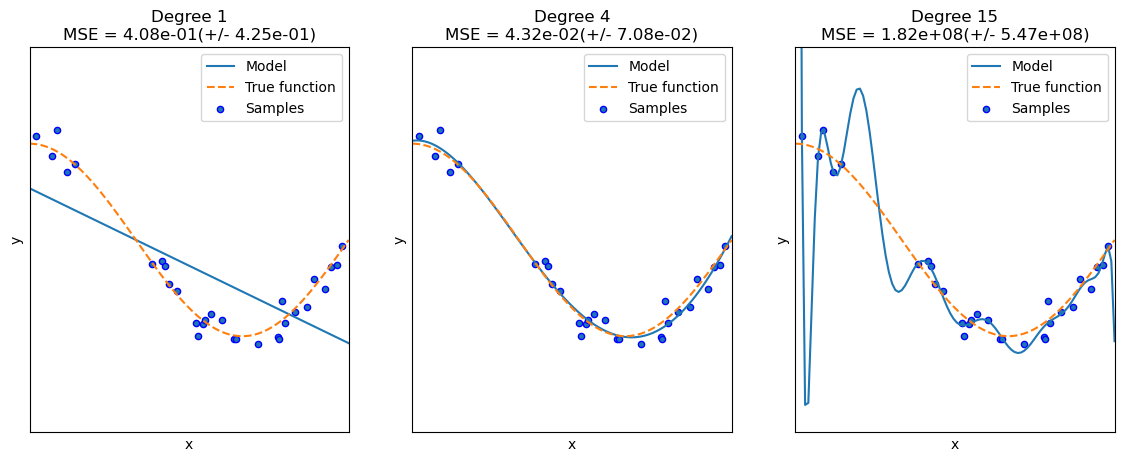

In [27]:
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degreee 별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])  # 오타 수정
    pipeline.fit(X.reshape(-1,1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교

    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')

    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()
